In [56]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
os.chdir("/Users/darylldalmeida/Documents/Data science/Datasets/Churn Prediction")

In [58]:
df = pd.read_csv("churn.csv")

## Problem Statement

- Customer churn is a critical issue faced by businesses across industries. 
- Acquiring a new customer can cost 5–7 times more than retaining an existing one, and high churn rates directly reduce revenue and profitability. 
- The challenge for companies is not only to identify which customers are at risk of leaving, but also to understand the drivers behind churn so they can design proactive retention strategies.

- This project aims to predict customer churn risk using demographic, behavioral, and engagement data from an e-commerce platform. 
- The goal is to classify customers into “high risk” and “low risk” segments, enabling businesses to focus resources on retaining valuable customers before they leave.

In [59]:
df.head(10)

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15
5,CUST_7265,54,Male,Canada,114.31,11,210,0,Beauty,56.5,2021-10-02,44,0.21
6,CUST_1466,27,Female,Canada,34.03,7,212,0,Electronics,0.2,2021-12-19,60,0.39
7,CUST_5426,77,Female,Brazil,171.25,9,20,0,Electronics,15.1,2021-02-09,29,0.24
8,CUST_6578,73,Female,Australia,116.79,10,87,0,Sports,14.7,2020-09-02,85,0.37
9,CUST_9322,26,Male,France,55.93,4,12,0,Fashion,68.8,2024-02-25,63,0.52


In [60]:
df.tail()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
4995,CUST_8533,49,Female,UK,132.16,9,306,0,Electronics,20.9,2020-10-17,13,0.33
4996,CUST_5616,23,Female,UK,47.81,10,296,0,Home,NaN,2024-10-21,66,0.22
4997,CUST_2140,79,Male,Japan,224.97,16,84,0,Beauty,92.9,2022-11-13,56,0.23
4998,CUST_6730,62,Male,USA,220.33,8,254,0,Fashion,83.8,2023-05-29,47,0.09
4999,CUST_8465,38,Male,Canada,75.57,6,326,0,Home,4.1,2021-09-02,77,0.49


In [61]:
df.describe()

,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk
count,5000.000000,4750.000000,5000.000000,5000.000000,5000.000000,4750.000000,5000.000000,5000.000000
mean,48.163200,108.442857,10.027000,180.073200,0.025800,50.714842,50.039400,0.284484
std,17.880797,69.265559,3.163838,104.926518,0.158554,29.098706,28.832151,0.159690
min,18.000000,10.660000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,57.805000,8.000000,89.000000,0.000000,25.225000,25.000000,0.160000
50%,48.000000,93.190000,10.000000,178.000000,0.000000,50.950000,50.000000,0.260000
75%,64.000000,142.197500,12.000000,270.000000,0.000000,76.800000,75.000000,0.390000
max,79.000000,555.460000,23.000000,364.000000,1.000000,100.000000,99.000000,0.900000


In [62]:
df.shape

(5000, 13)

## EDA

In [63]:
df.isnull().sum()

customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64

## Insights

- We have null values present in avg_order_value and the email_open_rate columns. 

In [64]:
##Missing values summary

missing_summary = df.isnull().sum().to_frame(name="Missing_Count")

missing_summary["Missing_%"] = (missing_summary["Missing_Count"]/len(df)) * 100

In [65]:
print(missing_summary)

                    Missing_Count  Missing_%
customer_id                     0        0.0
age                             0        0.0
gender                          0        0.0
country                         0        0.0
avg_order_value               250        5.0
total_orders                    0        0.0
last_purchase                   0        0.0
is_fraudulent                   0        0.0
preferred_category              0        0.0
email_open_rate               250        5.0
customer_since                  0        0.0
loyalty_score                   0        0.0
churn_risk                      0        0.0


- 5% of the rows are missing from both the fields. So we will impute these values with their median rather than dropping them because they could be useful for our project. 

## Checking the null values in email_open_rate & avg_order_value

In [66]:
df[df.isnull().any(axis=1)]

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
30,CUST_2899,48,Female,Canada,NaN,8,200,0,Home,43.3,2022-12-29,3,0.27
53,CUST_2021,22,Female,USA,NaN,9,255,0,Home,36.5,2021-12-15,65,0.13
58,CUST_1161,36,Male,Japan,NaN,12,85,0,Beauty,2.9,2023-02-22,45,0.35
86,CUST_7736,68,Female,China,76.59,13,325,0,Beauty,NaN,2021-12-22,19,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,CUST_1220,78,Female,Brazil,43.59,7,195,0,Beauty,NaN,2023-06-03,10,0.04
4959,CUST_8813,79,Male,Japan,NaN,9,214,0,Home,91.1,2025-04-26,29,0.11
4967,CUST_2001,23,Female,India,NaN,16,82,0,Electronics,96.2,2022-08-31,37,0.07
4977,CUST_1271,26,Male,Australia,NaN,12,188,0,Fashion,62.7,2021-06-04,87,0.40


In [67]:
df[['avg_order_value','email_open_rate']].isnull().sum()

avg_order_value    250
email_open_rate    250
dtype: int64

In [68]:
df['avg_order_value'].fillna(df['avg_order_value'].median(),inplace=True)

df['email_open_rate'].fillna(df['email_open_rate'].median(), inplace=True)

In [69]:
df.isnull().sum()

customer_id           0
age                   0
gender                0
country               0
avg_order_value       0
total_orders          0
last_purchase         0
is_fraudulent         0
preferred_category    0
email_open_rate       0
customer_since        0
loyalty_score         0
churn_risk            0
dtype: int64

- Now we do not have any null values and we are good to go with the next steps.

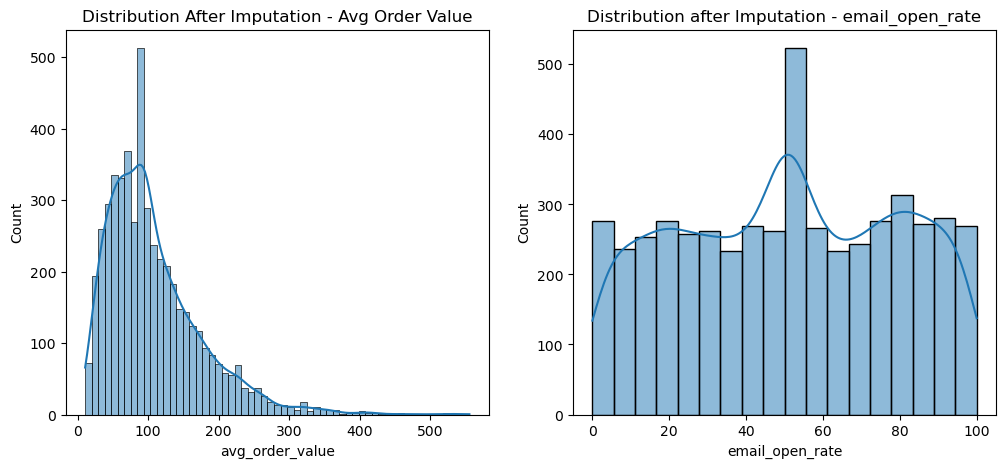

In [70]:
fig, axes = plt.subplots(1,2,figsize = [12,5])

sns.histplot(df['avg_order_value'],kde=True,ax=axes[0])
axes[0].set_title('Distribution After Imputation - Avg Order Value')

sns.histplot(df['email_open_rate'], kde = True, ax=axes[1])
axes[1].set_title('Distribution after Imputation - email_open_rate')

plt.show()

### Insight: Post-Imputation Distribution Analysis

- The `avg_order_value` variable remains right-skewed, indicating that most customers make smaller purchases, while a few spend significantly more — a common e-commerce pattern.  

- The `email_open_rate` variable shows a broad distribution of engagement, with customers ranging from low to highly engaged, suggesting that marketing reach is variable across segments. 
 
- The imputation process did not introduce bias or distort the data distributions, confirming that median imputation was an appropriate choice for handling missing values in both variables.


In [71]:
df['age'].value_counts(ascending=True)

77     62
64     65
44     67
70     67
60     69
     ... 
71     94
43     94
59     97
56     98
35    101
Name: age, Length: 62, dtype: int64

In [72]:
df['country'].unique()

array(['Brazil', 'USA', 'Australia', 'Japan', 'Canada', 'France', 'India',
       'China', 'Germany', 'UK'], dtype=object)

In [73]:
df['country'].nunique()

10

In [74]:
df['preferred_category'].unique()

array(['Beauty', 'Electronics', 'Sports', 'Fashion', 'Home'], dtype=object)

In [75]:
df.duplicated().sum()

0

In [76]:
df['churn_risk'].value_counts(normalize=True)

0.20    0.0268
0.21    0.0268
0.18    0.0266
0.14    0.0262
0.25    0.0256
         ...  
0.73    0.0004
0.80    0.0002
0.88    0.0002
0.90    0.0002
0.85    0.0002
Name: churn_risk, Length: 88, dtype: float64

In [77]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15


In [78]:
df.groupby('gender')['total_orders'].sum()

gender
Female    22293
Male      23028
Other      4814
Name: total_orders, dtype: int64

### Q. Which countries have the highest orders?

In [79]:
df.groupby('country')['total_orders'].sum().sort_values(ascending = False)

country
India        5226
USA          5180
Australia    5158
China        5107
Brazil       5104
Germany      4982
Canada       4963
UK           4891
France       4875
Japan        4649
Name: total_orders, dtype: int64

### Q. What's the preferred category for customers?

In [80]:
df.groupby('preferred_category')['total_orders'].sum().sort_values(ascending=False)

preferred_category
Beauty         10328
Electronics    10293
Home           10121
Fashion         9719
Sports          9674
Name: total_orders, dtype: int64

### Q. What's the average age of customers who fall into the Beauty category for customers?

In [81]:
df.groupby('preferred_category')['age'].mean().sort_values(ascending=False)

preferred_category
Electronics    48.970617
Beauty         48.200000
Home           48.119522
Fashion        47.772308
Sports         47.709845
Name: age, dtype: float64

- The average age of customers across all categories lies between 47 and 49 years, indicating a predominantly middle-aged customer base.

- Electronics customers are slightly older on average, while sports and fashion tend to attract relatively younger buyers.

- The minimal variation suggests that product preference is not strongly age-driven, but minor differences could still reflect lifestyle or income-level effects.

### Q. What’s the average loyalty score for each preferred category?

In [54]:
df.groupby('preferred_category')['loyalty_score'].mean()

preferred_category
Beauty         49.390338
Electronics    49.692458
Fashion        49.914872
Home           50.593625
Sports         50.651813
Name: loyalty_score, dtype: float64

## Simplifying Target variable

In [82]:
df['churn_flag'] = np.where(df['churn_risk'] > 0.5, 'High','Low')

df['churn_flag'].value_counts(normalize=True)

Low     0.8964
High    0.1036
Name: churn_flag, dtype: float64

### Q. What’s the average email_open_rate by churn_flag?

In [86]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,churn_flag
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20,Low
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34,Low
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05,Low
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19,Low
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15,Low


In [88]:
df.groupby('churn_flag')['email_open_rate'].mean()

churn_flag
High    51.288031
Low     50.661714
Name: email_open_rate, dtype: float64

### Insight

- Email engagement alone isn’t a strong predictor of churn in the dataset since churn flag High & Low both do not show much differences.

### Q. Identifying which types of customers (by age, gender, or region) are most at risk.

In [89]:
pd.crosstab(df['gender'],df['churn_flag'], normalize='index') * 100

churn_flag,High,Low
gender,,
Female,11.150758,88.849242
Male,10.096576,89.903424
Other,7.916667,92.083333


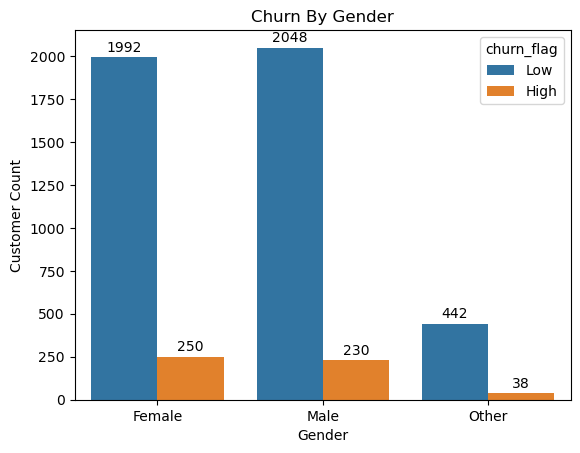

In [124]:
ax = sns.countplot(data=df, x = 'gender',hue='churn_flag')
plt.title("Churn By Gender")
plt.xlabel("Gender")
plt.ylabel("Customer Count")

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type = 'edge',fontsize = 10,padding = 2)

plt.show()

### Insight 

- Female churn count (250) is slightly higher than male churn (230), even though male total customers are slightly higher (2048 vs 1992).

In [33]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


## Analyzing purchase behaviour

### Checking if higher spenders are more loyal or if low-spenders are leaving.

In [94]:
df.groupby('churn_flag')['avg_order_value'].mean()

churn_flag
High    107.414691
Low     107.710901
Name: avg_order_value, dtype: float64

In [95]:
df.groupby('churn_flag')['total_orders'].mean()

churn_flag
High     9.959459
Low     10.034806
Name: total_orders, dtype: float64

### Insight

- Customers who churn and those who stay show almost identical spending patterns in both order value and order frequency. 

- This indicates that spending is not a key differentiator between loyal and at-risk customers. 


In [96]:
df.groupby('churn_flag')['loyalty_score'].mean()

churn_flag
High    49.938224
Low     50.051093
Name: loyalty_score, dtype: float64

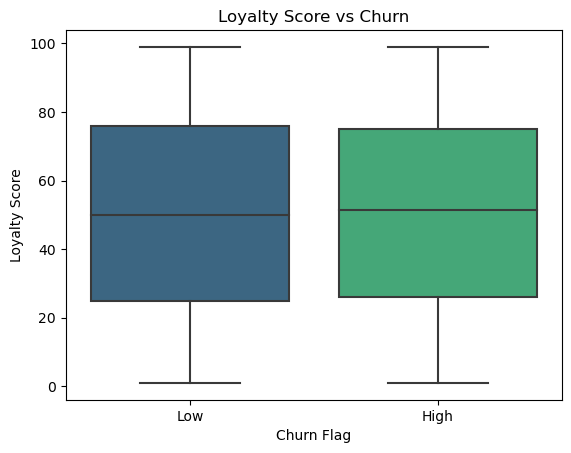

In [122]:
sns.boxplot(data=df, x='churn_flag', y='loyalty_score', palette='viridis')
plt.title('Loyalty Score vs Churn')
plt.xlabel('Churn Flag')
plt.ylabel('Loyalty Score')
plt.show()

### Insight

- Loyalty score vs churn flag does not give us a strong indicator as they both are almost identical.

In [99]:
df[df['churn_flag'] == 'High'].head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,churn_flag
9,CUST_9322,26,Male,France,55.93,4,12,0,Fashion,68.8,2024-02-25,63,0.52,High
12,CUST_7949,19,Male,India,77.24,12,128,0,Home,26.5,2021-06-28,45,0.63,High
14,CUST_6311,73,Female,India,131.23,7,41,0,Sports,80.3,2024-05-21,35,0.61,High
66,CUST_7863,32,Female,UK,22.84,11,154,0,Home,47.5,2022-05-30,13,0.59,High
84,CUST_6258,71,Female,USA,49.42,8,127,0,Beauty,31.5,2025-03-10,41,0.64,High


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     5000 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     5000 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
 13  churn_flag          5000 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 547.0+ KB


In [101]:
df['customer_since'] = pd.to_datetime(df['customer_since'])

In [102]:
df['tenure_days'] = (df['customer_since'].max() - df['customer_since']).dt.days

In [103]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,churn_flag,tenure_days
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20,Low,388
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34,Low,495
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05,Low,438
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19,Low,1816
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15,Low,80


In [104]:
df['customer_since'].max()

Timestamp('2025-06-28 00:00:00')

- Converted customer_since to datetime format for time-based analysis.

- Created a new feature tenure_days representing the number of days a customer has been with the company.

- The reference date used for calculation is 2025-06-28, which represents the most recent date point.

- This allows us to analyze whether newer customers are more likely to churn compared to long-term ones.

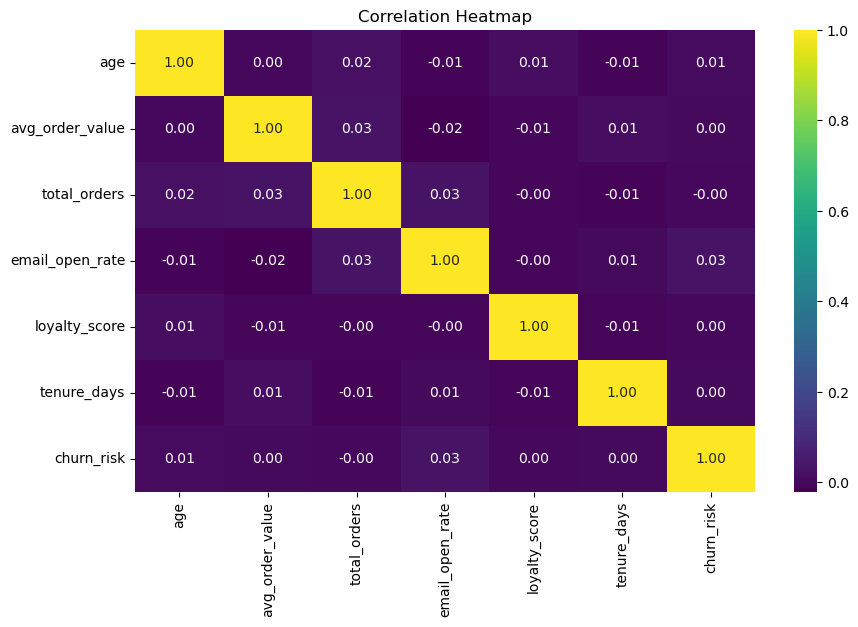

In [121]:
numeric_cols = ['age', 'avg_order_value', 'total_orders', 'email_open_rate',
                'loyalty_score', 'tenure_days', 'churn_risk']
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Insight

- We do not have high correlation here between any of the numeric features.

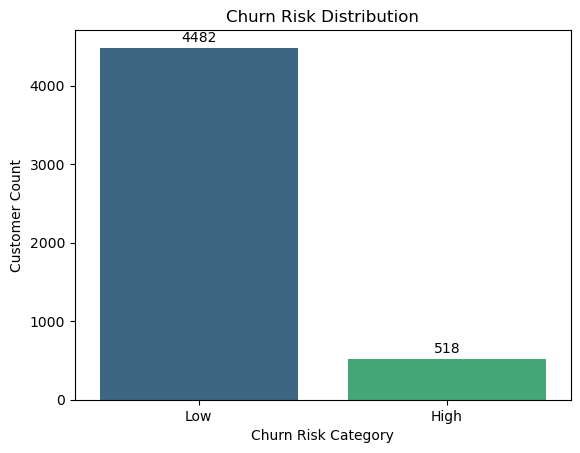

In [120]:
ax = sns.countplot(data = df, x = 'churn_flag', palette='viridis')
plt.title("Churn Risk Distribution")
plt.xlabel("Churn Risk Category")
plt.ylabel('Customer Count')

for container in ax.containers:
    ax.bar_label(container,fmt='%d',label_type='edge',fontsize = 10, padding = 2 )
    

plt.show()

## Insight

- The dataset is imbalanced with a larger portion of the customers having larger proportion of low-risk customers (approximately 89.6%) compared to high-risk customers (around 10.4%). 

## Feature Engineering

### 1. Customer Tenure Segments

In [107]:
bins = [0,180,365,730,2000]

labels = ['<6 months','6-12 months','1-2 years','>2 years']

df['tenure_group'] = pd.cut(df['tenure_days'], bins = bins, labels=labels)

In [108]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,churn_flag,tenure_days,tenure_group
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20,Low,388,1-2 years
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34,Low,495,1-2 years
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05,Low,438,1-2 years
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19,Low,1816,>2 years
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15,Low,80,<6 months


### 2. Spend per order

In [111]:
df['spend_per_order'] = (df['avg_order_value']/df['total_orders']).round(2)

df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,churn_flag,tenure_days,tenure_group,spend_per_order
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20,Low,388,1-2 years,12.64
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34,Low,495,1-2 years,9.04
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05,Low,438,1-2 years,13.88
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19,Low,1816,>2 years,12.21
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15,Low,80,<6 months,16.84


### 3. Engagement Level Buckets

In [112]:
bins = [0,25,50,75,100]

labels = ['Low','Medium','High','Very High']

df['engagement_level'] = pd.cut(df['email_open_rate'],bins=bins, labels=labels)

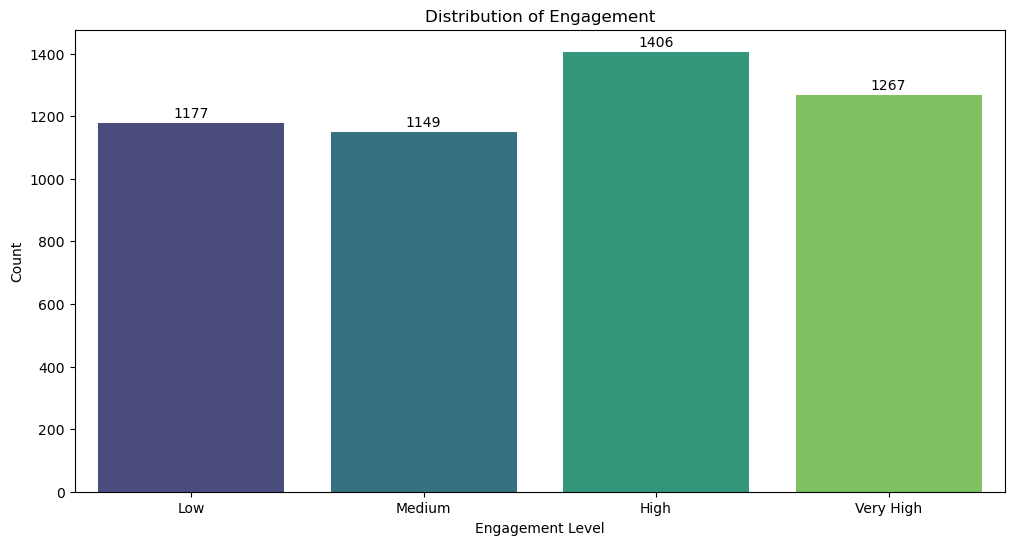

In [126]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'engagement_level', palette='viridis')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.title('Distribution of Engagement')

for container in ax.containers:
    ax.bar_label(container, fmt = '%d',label_type='edge',padding=2,fontsize = 10,color = 'black')
plt.show()

In [113]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,churn_flag,tenure_days,tenure_group,spend_per_order,engagement_level
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20,Low,388,1-2 years,12.64,Medium
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34,Low,495,1-2 years,9.04,Low
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05,Low,438,1-2 years,13.88,High
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19,Low,1816,>2 years,12.21,Medium
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15,Low,80,<6 months,16.84,Low


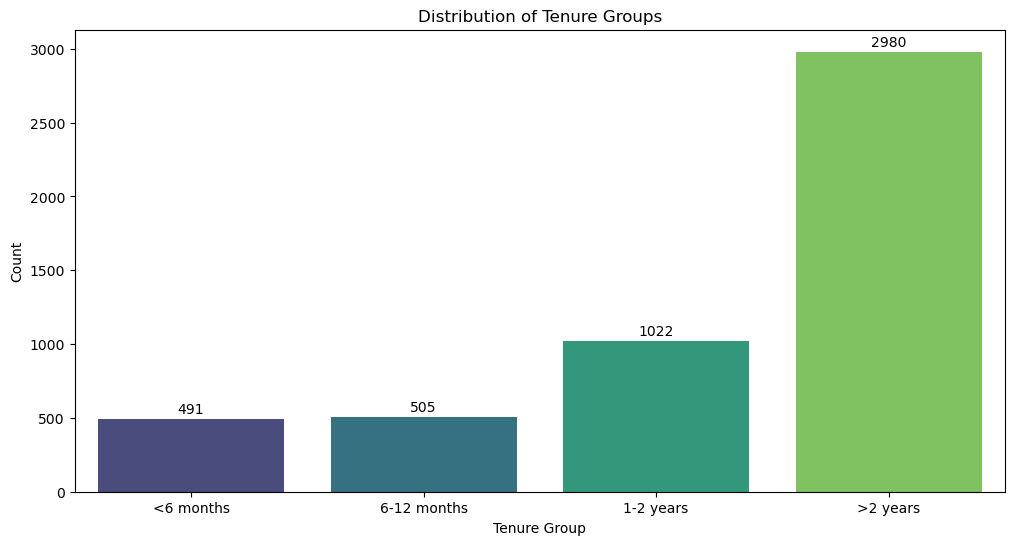

In [119]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'tenure_group', palette='viridis')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.title('Distribution of Tenure Groups')

for container in ax.containers:
    ax.bar_label(container, fmt = '%d',label_type='edge',padding=2,fontsize = 10,color = 'black')
plt.show()

### Insight

- This means roughly 60% of the entire customer base has been loyal for more than two years.

### 4. Recency

- Logic used here for Recency is the Recency days = reference date - last purchase date

In [125]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,churn_flag,tenure_days,tenure_group,spend_per_order,engagement_level
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.60,2024-06-05,50,0.20,Low,388,1-2 years,12.64,Medium
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.30,2024-02-19,37,0.34,Low,495,1-2 years,9.04,Low
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,50.95,2024-04-16,65,0.05,Low,438,1-2 years,13.88,High
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.90,2020-07-08,93,0.19,Low,1816,>2 years,12.21,Medium
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.30,2025-04-09,79,0.15,Low,80,<6 months,16.84,Low


In [127]:
df.loc[df['last_purchase'].idxmax()]


customer_id                     CUST_8280
age                                    44
gender                               Male
country                             India
avg_order_value                    153.58
total_orders                           10
last_purchase                         364
is_fraudulent                           0
preferred_category                 Sports
email_open_rate                      64.8
customer_since        2021-03-08 00:00:00
loyalty_score                          94
churn_risk                           0.51
churn_flag                           High
tenure_days                          1573
tenure_group                     >2 years
spend_per_order                     15.36
engagement_level                     High
Name: 160, dtype: object

In [128]:
df.loc[df['churn_risk'].idxmax()]


customer_id                     CUST_2089
age                                    51
gender                               Male
country                             China
avg_order_value                     61.11
total_orders                           10
last_purchase                         288
is_fraudulent                           0
preferred_category                 Beauty
email_open_rate                      74.3
customer_since        2023-08-08 00:00:00
loyalty_score                          69
churn_risk                            0.9
churn_flag                           High
tenure_days                           690
tenure_group                    1-2 years
spend_per_order                      6.11
engagement_level                     High
Name: 2375, dtype: object

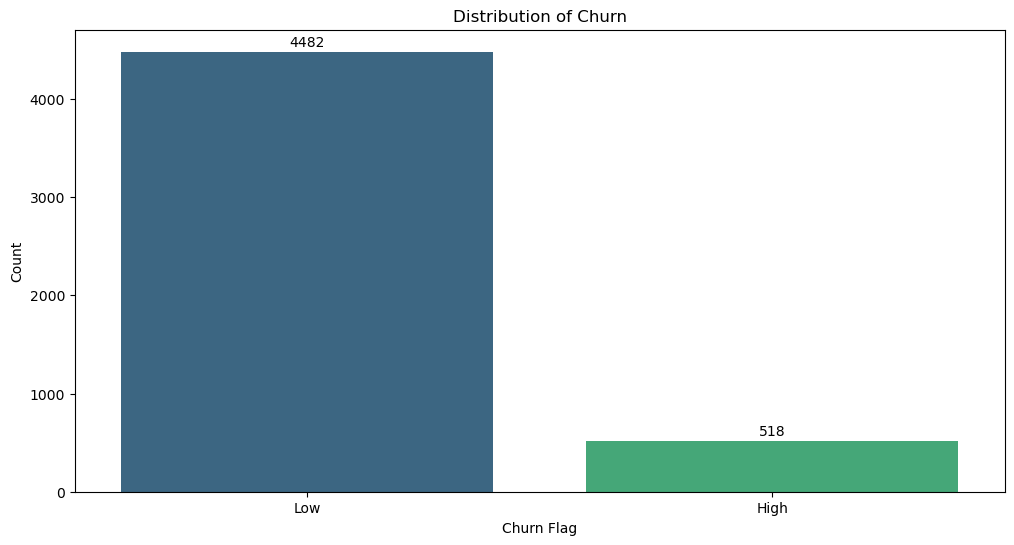

In [130]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x = 'churn_flag', palette='viridis')
plt.xlabel('Churn Flag')
plt.ylabel('Count')
plt.title('Distribution of Churn')

for container in ax.containers:
    ax.bar_label(container, fmt = '%d',label_type='edge',padding=2,fontsize = 10,color = 'black')
plt.show()

### Insight

- The dataset is highly imbalanced, with only 10% of customers labeled as churners.